In [1]:
# Import Libraries
from tensorflow.keras.preprocessing.image import load_img
import warnings
warnings.filterwarnings("ignore")

import os
import glob
import matplotlib.pyplot as plt
# Keras API
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, AveragePooling2D, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [2]:
# My data is in google drive.
train_dir = "D://project//Segmented Medicinal Leaf Images"
test_dir="D://project//Segmented Medicinal Leaf Images"


In [3]:
# function to get count of images
def get_files(directory):
  if not os.path.exists(directory):
    return 0
  count=0
  for current_path,dirs,files in os.walk(directory):
    for dr in dirs:
      count+= len(glob.glob(os.path.join(current_path,dr+"/*")))
  return count    

In [4]:
train_samples =get_files(train_dir)
num_classes=len(glob.glob(train_dir+"/*"))
test_samples=get_files(test_dir) # For testing i took only few samples from unseen data. we can evaluate using validation data which is part of train data.
print(num_classes,"Classes")
print(train_samples,"Train images")
print(test_samples,"Test images")

30 Classes
1835 Train images
1835 Test images


In [5]:
# Preprocessing data.
train_datagen=ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   validation_split=0.2, # validation split 20%.
                                   horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [6]:
# set height and width and color of input image.
img_width,img_height =256,256
input_shape=(img_width,img_height,3)
batch_size =512

train_generator =train_datagen.flow_from_directory(train_dir,
                                                   target_size=(img_width,img_height),
                                                   batch_size=batch_size)
test_generator=test_datagen.flow_from_directory(test_dir,shuffle=True, target_size=(img_width,img_height), batch_size=batch_size)

Found 1835 images belonging to 30 classes.
Found 1835 images belonging to 30 classes.


In [7]:
train_generator.class_indices

{'Alpinia Galanga (Rasna)': 0,
 'Amaranthus Viridis (Arive-Dantu)': 1,
 'Artocarpus Heterophyllus (Jackfruit)': 2,
 'Azadirachta Indica (Neem)': 3,
 'Basella Alba (Basale)': 4,
 'Brassica Juncea (Indian Mustard)': 5,
 'Carissa Carandas (Karanda)': 6,
 'Citrus Limon (Lemon)': 7,
 'Ficus Auriculata (Roxburgh fig)': 8,
 'Ficus Religiosa (Peepal Tree)': 9,
 'Hibiscus Rosa-sinensis': 10,
 'Jasminum (Jasmine)': 11,
 'Mangifera Indica (Mango)': 12,
 'Mentha (Mint)': 13,
 'Moringa Oleifera (Drumstick)': 14,
 'Muntingia Calabura (Jamaica Cherry-Gasagase)': 15,
 'Murraya Koenigii (Curry)': 16,
 'Nerium Oleander (Oleander)': 17,
 'Nyctanthes Arbor-tristis (Parijata)': 18,
 'Ocimum Tenuiflorum (Tulsi)': 19,
 'Piper Betle (Betel)': 20,
 'Plectranthus Amboinicus (Mexican Mint)': 21,
 'Pongamia Pinnata (Indian Beech)': 22,
 'Psidium Guajava (Guava)': 23,
 'Punica Granatum (Pomegranate)': 24,
 'Santalum Album (Sandalwood)': 25,
 'Syzygium Cumini (Jamun)': 26,
 'Syzygium Jambos (Rose Apple)': 27,
 'Tab

In [8]:
# CNN building.
model = Sequential()
model.add(Conv2D(32, (5, 5),input_shape=input_shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(32, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))   
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128,activation='relu'))          
model.add(Dense(num_classes,activation='softmax'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 252, 252, 32)        │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 84, 84, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 82, 82, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 41, 41, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 39, 39, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 19, 19, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 23104)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      11,829,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 30)                  │           3,870 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,929,470 (45.51 MB)

 Trainable params: 11,929,470 (45.51 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model_layers = [ layer.name for layer in model.layers]
print('layer name : ',model_layers)

layer name :  ['conv2d', 'max_pooling2d', 'conv2d_1', 'max_pooling2d_1', 'conv2d_2', 'max_pooling2d_2', 'flatten', 'dense', 'dropout', 'dense_1', 'dense_2']


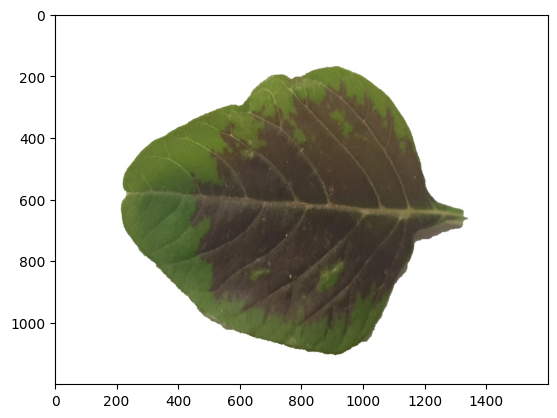

In [10]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

# Load and display image
img1 = load_img("D://project//Segmented Medicinal Leaf Images//Amaranthus Viridis (Arive-Dantu)//AV-S-001.jpg")
plt.imshow(img1)

# Preprocess image
img1 = load_img("D://project//Segmented Medicinal Leaf Images//Amaranthus Viridis (Arive-Dantu)//AV-S-001.jpg", target_size=(256, 256))
img = img_to_array(img1)
img = img / 255
img = np.expand_dims(img, axis=0)

plt.show()  # Show the plotted image


In [13]:

# Visualizing output after every layer.
from keras.models import Model
conv2d_1_output = Model(inputs=model.input, outputs=model.get_layer('conv2d').output)
max_pooling2d_1_output = Model(inputs=model.input,outputs=model.get_layer('max_pooling2d').output)
conv2d_2_output = Model(inputs=model.input,outputs=model.get_layer('conv2d_1').output)
max_pooling2d_2_output = Model(inputs=model.input,outputs=model.get_layer('max_pooling2d_1').output)
conv2d_3_output = Model(inputs=model.input,outputs=model.get_layer('conv2d_2').output)
max_pooling2d_3_output = Model(inputs=model.input,outputs=model.get_layer('max_pooling2d_2').output)
flatten_1_output = Model(inputs=model.input,outputs=model.get_layer('flatten').output)
conv2d_1_features = conv2d_1_output.predict(img)
max_pooling2d_1_features = max_pooling2d_1_output.predict(img)
conv2d_2_features = conv2d_2_output.predict(img)
max_pooling2d_2_features = max_pooling2d_2_output.predict(img)
conv2d_3_features = conv2d_3_output.predict(img)
max_pooling2d_3_features = max_pooling2d_3_output.predict(img)
flatten_1_features = flatten_1_output.predict(img)

ValueError: The layer sequential has never been called and thus has no defined input.

In [12]:
DATASET_DIR = "D://Docs//Smart India Hackathon//all_dataset"
DATASET_TRAIN_DIR = os.path.join(
    DATASET_DIR, "/")  # Update the directory path
DATASET_TEST_DIR = os.path.join(
    DATASET_DIR, "/")  # Update the directory path

# Define the number of classes in your dataset
num_classes = len(os.listdir(DATASET_DIR))
print (num_classes)

169


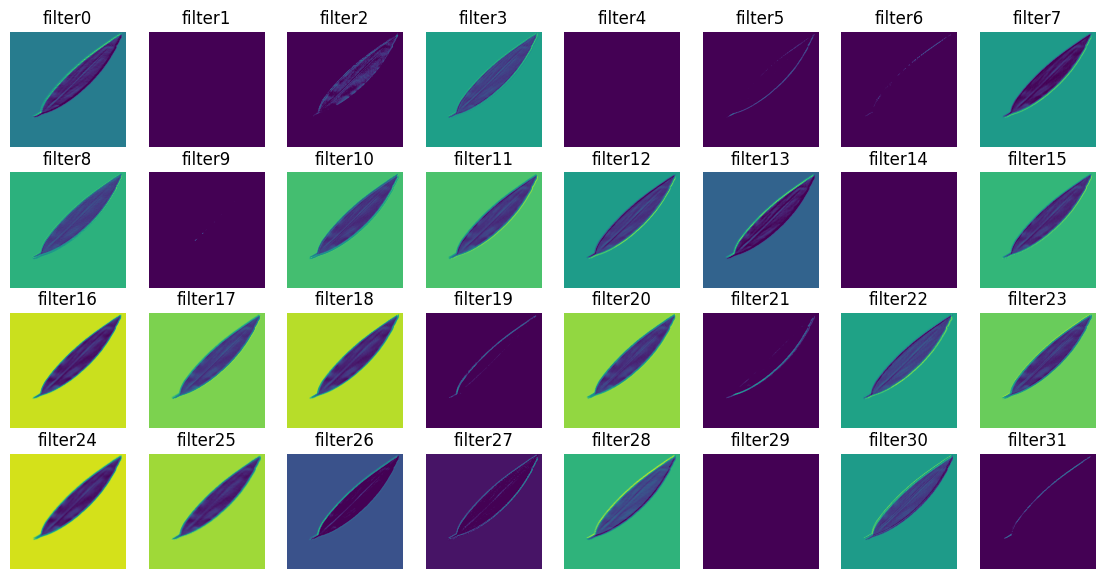

In [13]:
import matplotlib.image as mpimg

fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(conv2d_1_features[0, :, :, i], cmap='viridis') # Visualizing in color mode.
plt.show()

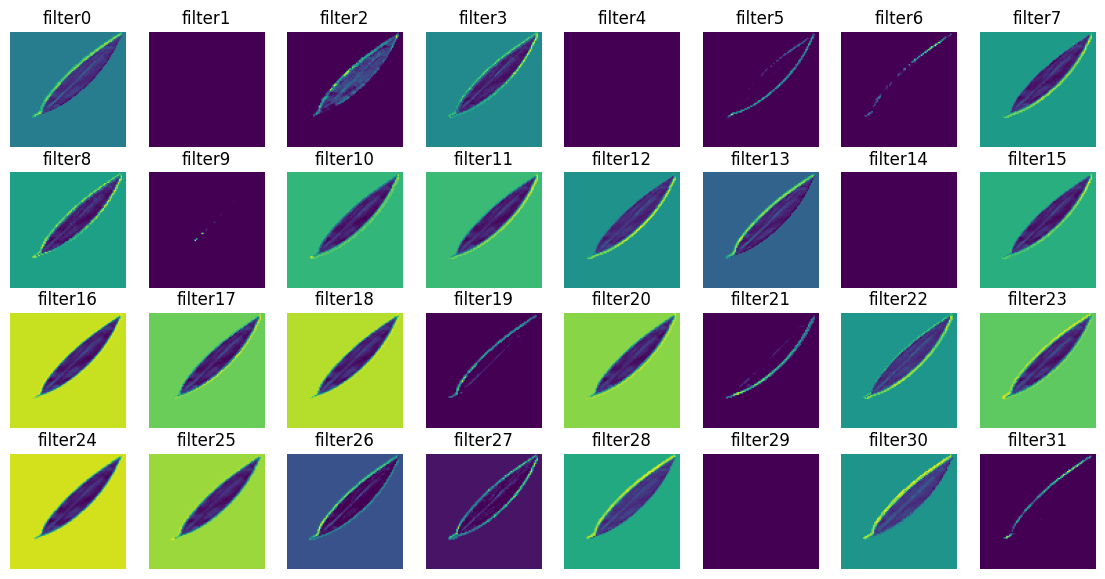

In [14]:
import matplotlib.image as mpimg

fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(max_pooling2d_1_features[0, :, :, i], cmap='viridis')
plt.show()

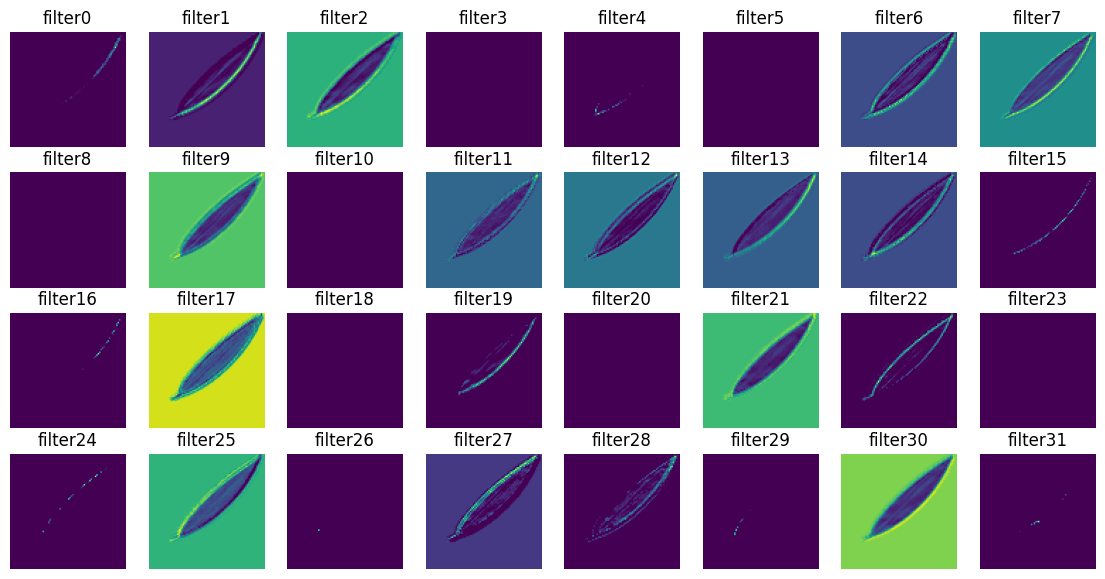

In [15]:
import matplotlib.image as mpimg

fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(conv2d_2_features[0, :, :, i], cmap='viridis')
plt.show()

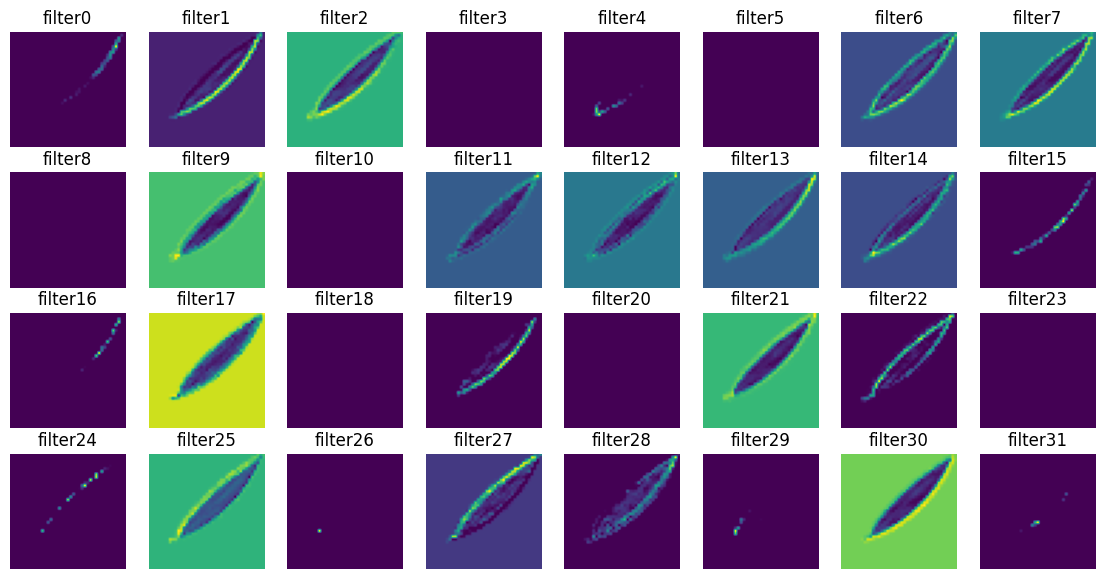

In [16]:
# we can also visualize in color mode.
import matplotlib.image as mpimg

fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(max_pooling2d_2_features[0, :, :, i], cmap='viridis') 
plt.show()

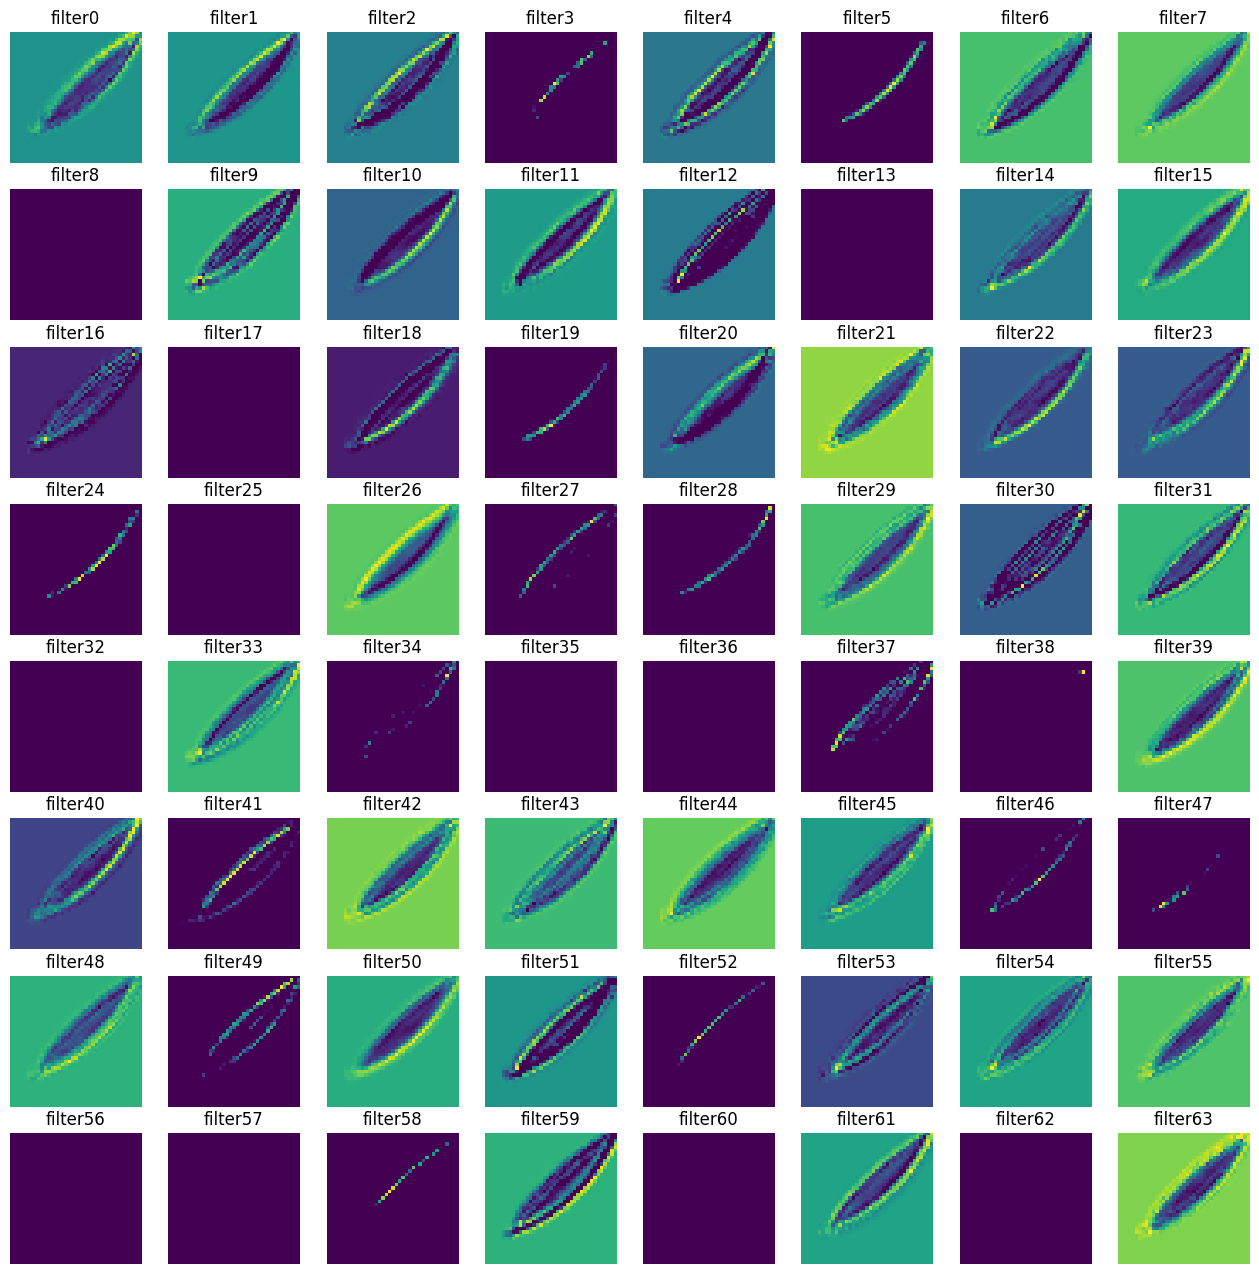

In [17]:
import matplotlib.image as mpimg

fig=plt.figure(figsize=(16,16))
columns =8 
rows = 8
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(conv2d_3_features[0, :, :, i], cmap='viridis')
plt.show()

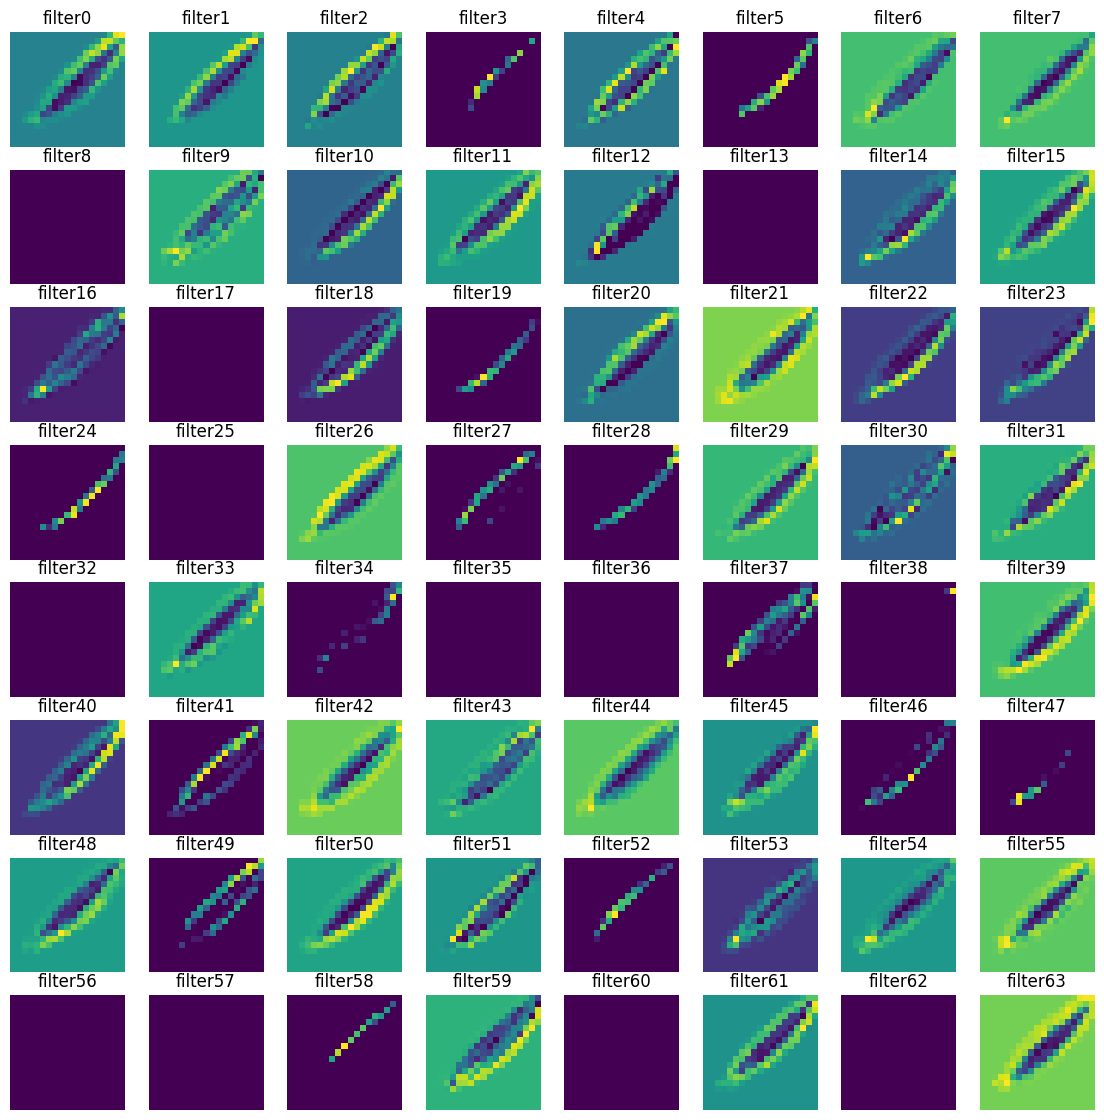

In [18]:
import matplotlib.image as mpimg

fig=plt.figure(figsize=(14,14))
columns = 8
rows = 8
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(max_pooling2d_3_features[0, :, :, i],cmap='viridis')
plt.show()

In [15]:
# validation data.
validation_generator = train_datagen.flow_from_directory(
    train_dir, # same directory as training data
    target_size=(img_height, img_width),
    batch_size=batch_size) 

Found 1835 images belonging to 30 classes.


Epoch 1/75
3/3 ━━━━━━━━━━━━━━━━━━━━ 95s 30s/step - accuracy: 0.0342 - loss: 3.7179 - val_accuracy: 0.0384 - val_loss: 3.4097
Epoch 2/75
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.0332 - loss: 3.4396 - val_accuracy: 0.0836 - val_loss: 3.3398
Epoch 3/75
3/3 ━━━━━━━━━━━━━━━━━━━━ 74s 18s/step - accuracy: 0.0744 - loss: 3.3587 - val_accuracy: 0.1270 - val_loss: 3.3073
Epoch 4/75
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.0879 - loss: 3.3462 - val_accuracy: 0.0468 - val_loss: 3.2839
Epoch 5/75
3/3 ━━━━━━━━━━━━━━━━━━━━ 76s 18s/step - accuracy: 0.1032 - loss: 3.2638 - val_accuracy: 0.1888 - val_loss: 3.1190
Epoch 6/75
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.1304 - loss: 3.1271 - val_accuracy: 0.1806 - val_loss: 3.1057
Epoch 7/75
3/3 ━━━━━━━━━━━━━━━━━━━━ 82s 22s/step - accuracy: 0.1621 - loss: 3.0717 - val_accuracy: 0.2201 - val_loss: 2.8735
Epoch 8/75
3/3 ━━━━━━━━━━━━━━━━━━━━ 16s 3s/step - accuracy: 0.1914 - loss: 2.9310 - val_accuracy: 0.2408 - val_loss: 2.8530
Epoch 

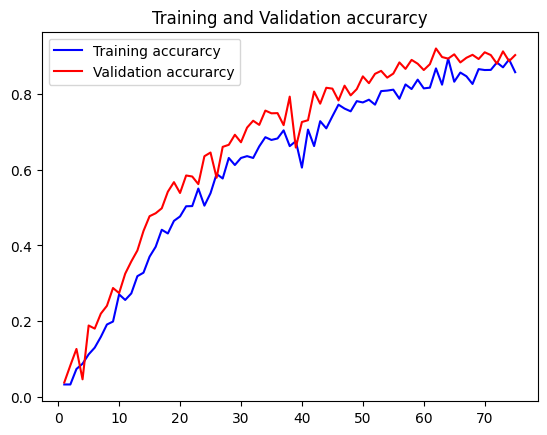

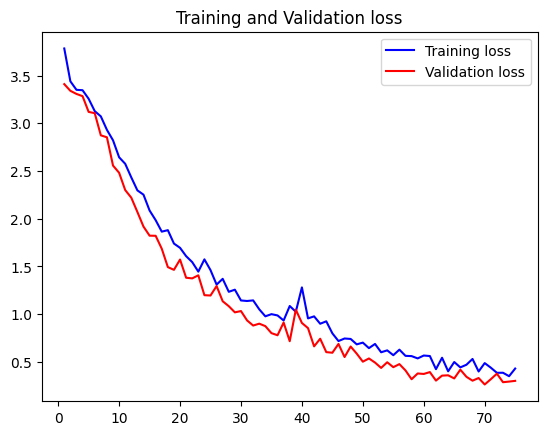

In [17]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.optimizers import Adam

opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='categorical_crossentropy',
              metrics=['accuracy'])
train = model.fit(train_generator,
                            epochs=75,
                            steps_per_epoch=train_generator.samples // batch_size,
                            validation_data=validation_generator,
                            validation_steps=validation_generator.samples // batch_size,
                            verbose=1)


acc = train.history['accuracy']
val_acc = train.history['val_accuracy']
loss = train.history['loss']
val_loss = train.history['val_loss']


epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()


In [18]:
score,accuracy =model.evaluate(test_generator,verbose=1)
print("Test score is {}".format(score))
print("Test accuracy is {}".format(accuracy))

4/4 ━━━━━━━━━━━━━━━━━━━━ 15s 4s/step - accuracy: 0.9251 - loss: 0.2431
Test score is 0.24492517113685608
Test accuracy is 0.9220708608627319


In [19]:
# Save entire model with optimizer, architecture, weights and training configuration.
from keras.models import load_model
model.save('leaf.h5')

In [20]:
model.save('leaf.keras')


In [22]:
model.save_weights('leaf_weights.weights.h5')


In [23]:
# Get classes of model trained on
classes = train_generator.class_indices 
classes


{'Alpinia Galanga (Rasna)': 0,
 'Amaranthus Viridis (Arive-Dantu)': 1,
 'Artocarpus Heterophyllus (Jackfruit)': 2,
 'Azadirachta Indica (Neem)': 3,
 'Basella Alba (Basale)': 4,
 'Brassica Juncea (Indian Mustard)': 5,
 'Carissa Carandas (Karanda)': 6,
 'Citrus Limon (Lemon)': 7,
 'Ficus Auriculata (Roxburgh fig)': 8,
 'Ficus Religiosa (Peepal Tree)': 9,
 'Hibiscus Rosa-sinensis': 10,
 'Jasminum (Jasmine)': 11,
 'Mangifera Indica (Mango)': 12,
 'Mentha (Mint)': 13,
 'Moringa Oleifera (Drumstick)': 14,
 'Muntingia Calabura (Jamaica Cherry-Gasagase)': 15,
 'Murraya Koenigii (Curry)': 16,
 'Nerium Oleander (Oleander)': 17,
 'Nyctanthes Arbor-tristis (Parijata)': 18,
 'Ocimum Tenuiflorum (Tulsi)': 19,
 'Piper Betle (Betel)': 20,
 'Plectranthus Amboinicus (Mexican Mint)': 21,
 'Pongamia Pinnata (Indian Beech)': 22,
 'Psidium Guajava (Guava)': 23,
 'Punica Granatum (Pomegranate)': 24,
 'Santalum Album (Sandalwood)': 25,
 'Syzygium Cumini (Jamun)': 26,
 'Syzygium Jambos (Rose Apple)': 27,
 'Tab

In [24]:
# Loading model and predict.
from keras.models import load_model
model=load_model('leaf.h5')

Classes = ['Alpinia Galanga (Rasna)',
           'Amaranthus Viridis (Arive-Dantu)',
           'Artocarpus Heterophyllus (Jackfruit)',
           'Azadirachta Indica (Neem)',
           'Basella Alba (Basale)',
           'Brassica Juncea (Indian Mustard)',
           'Carissa Carandas (Karanda)',
           'Citrus Limon (Lemon)',
           'Ficus Auriculata (Roxburgh fig)',
           'Ficus Religiosa (Peepal Tree)',
           'Hibiscus Rosa-sinensis',
           'Jasminum (Jasmine)',
           'Mangifera Indica (Mango)',
           'Mentha (Mint)',
           'Moringa Oleifera (Drumstick)',
           'Muntingia Calabura (Jamaica Cherry-Gasagase)',
           'Murraya Koenigii (Curry)',
           'Nerium Oleander (Oleander)',
           'Nyctanthes Arbor-tristis (Parijata)',
           'Ocimum Tenuiflorum (Tulsi)',
           'Piper Betle (Betel)',
           'Plectranthus Amboinicus (Mexican Mint)',
           'Pongamia Pinnata (Indian Beech)',
           'Psidium Guajava (Guava)',
           'Punica Granatum (Pomegranate)',
           'Santalum Album (Sandalwood)',
           'Syzygium Cumini (Jamun)',
           'Syzygium Jambos (Rose Apple)',
           'Tabernaemontana Divaricata (Crape Jasmine)',
           'Trigonella Foenum-graecum (Fenugreek)']


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
Alpinia Galanga (Rasna)


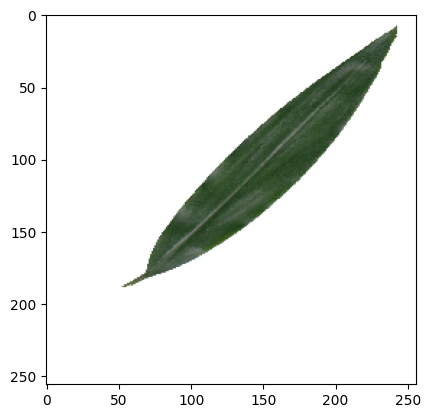

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Pre-Processing test data same as train data.
img_width = 256
img_height = 256


def prepare(img_path):
    img = image.load_img(img_path, target_size=(256, 256))
    x = image.img_to_array(img)
    x = x / 255
    return np.expand_dims(x, axis=0)


result = model.predict([prepare("C:\\Users\\Admin\\Pictures\\AG-S-001.jpg")])

predicted_class = np.argmax(result)
disease = image.load_img(
    "C:\\Users\\Admin\\Pictures\\AG-S-001.jpg", target_size=(256, 256))
plt.imshow(disease)
print(Classes[predicted_class])


In [33]:
import tensorflow as tf

# Load the Keras model
model = tf.keras.models.load_model('leaf.h5')

# Convert the Keras model to a TFLite model
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TFLite model to a file
open("output.tflite", "wb").write(tflite_model)


AttributeError: 'Sequential' object has no attribute '_get_save_spec'